In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [4]:
t,g, m1, m2, l1, l2 = sp.symbols("t g M1 M2 L1 L2")

In [16]:
th1, th2, hs = sp.symbols(r"\theta_1 , \theta_2, H_s", cls=sp.Function)
hs

H_s

In [18]:
th1 = th1(t)
th2 = th2(t)
hs = hs(t)
hs

H_s(t)

In [10]:
th1_d = sp.diff(th1,t)
th2_d = sp.diff(th2,t)
th1_dd = sp.diff(th1_d,t)
th2_dd = sp.diff(th2_d,t)
th1_d

Derivative(\theta_1(t), t)

In [12]:
x1 = l1*sp.sin(th1)
x2 = l2*sp.sin(th2) + l1*sp.sin(th1)
y1 = -l1*sp.cos(th1)
y2 = -l1*sp.cos(th1) - l2*sp.cos(th2)

In [8]:
x1

L1*sin(\theta_1(t))

In [9]:
x2

L1*sin(\theta_1(t)) + L2*sin(\theta_2(t))

In [10]:
y1

-L1*cos(\theta_1(t))

In [11]:
y2

-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t))

**Kinetic Energy**

In [13]:
 T = 1/2 * m1 * (sp.diff(x1,t)**2 + sp.diff(y1,t)**2) + 1/2 * m2* (sp.diff(x2,t)**2 + sp.diff(y2,t)**2)

In [14]:
T

0.5*M1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*M2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

**Potential Energy**

In [15]:
V = m1*g*y1 + m2 *g* y2

In [16]:
V

-L1*M1*g*cos(\theta_1(t)) + M2*g*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t)))

**Lagrangian**

In [17]:
L=T-V
L

L1*M1*g*cos(\theta_1(t)) + 0.5*M1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) - M2*g*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t))) + 0.5*M2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

**Euler-Lagrange equations for $\theta_1 \ \& \ \theta_2$**

In [18]:
LE1 = sp.diff(L,th1) - sp.diff(sp.diff(L,th1_d),t).simplify()
LE1

-L1*M1*g*sin(\theta_1(t)) - L1*M2*g*sin(\theta_1(t)) - L1*(L1*M1*Derivative(\theta_1(t), (t, 2)) + L1*M2*Derivative(\theta_1(t), (t, 2)) - L2*M2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L2*M2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + L2*M2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2))) + 0.5*M2*(2*L1*(L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_1(t))*Derivative(\theta_1(t), t) - 2*L1*(L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*sin(\theta_1(t))*Derivative(\theta_1(t), t))

In [19]:
LE2 = sp.diff(L,th2) - sp.diff(sp.diff(L,th2_d),t).simplify()
LE2

-L2*M2*g*sin(\theta_2(t)) - 1.0*L2*M2*(-L1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + L1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) + L2*Derivative(\theta_2(t), (t, 2))) + 0.5*M2*(2*L2*(L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_2(t))*Derivative(\theta_2(t), t) - 2*L2*(L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*sin(\theta_2(t))*Derivative(\theta_2(t), t))

In [20]:
solutions = sp.solve([LE1, LE2], (th1_dd, th2_dd), simplify=False, rational =False)

change the variable such that $ \frac{d\theta_1}{dt} =z_1 $ and $ \frac{d\theta_2}{dt}=z_2 $ 

In [21]:
dz1dt = sp.lambdify((t,g,m1,m2,l1,l2,th1,th2,th1_d,th2_d),solutions[th1_dd])
dz2dt = sp.lambdify((t,g,m1,m2,l1,l2,th1,th2,th1_d,th2_d),solutions[th2_dd])
dth1dt = sp.lambdify(th1_d,th1_d)
dth2dt = sp.lambdify(th2_d,th2_d)

In [22]:
def dVecdt(Vec, t, g, m1, m2, l1, l2):
    th1, z1, th2, z2 = Vec
    return [
        dth1dt(z1),
        dz1dt(t,g,m1,m2,l1,l2,th1,th2,z1,z2),
        dth2dt(z2),
        dz2dt(t,g,m1,m2,l1,l2,th1,th2,z1,z2)
    ]

In [23]:
t = np.linspace(0,100,10_00_000+1)
g = 9.8
m1 = 0.5
m2 = 0.5
l1 = 1
l2 = 1
sol = odeint(dVecdt, y0 = [np.pi/2, 0 ,np.pi/4, 0], t = t, args =(g,m1,m2,l1,l2))
#y0 = [1, -3, -1, 5] is the initial condition th1 = 1, z1 = -3, th2 = -1, z2 = 5

In [24]:
th1 = sol.T[0]
th2 = sol.T[2]
z1 = sol.T[1]
z2 = sol.T[3]

In [25]:
x1 = l1*np.sin(th1)
y1 = -l1*np.cos(th1)
x2 = l2*np.sin(th2) + l1*np.sin(th1)
y2 = -l1*np.cos(th1) - l2*np.cos(th2)

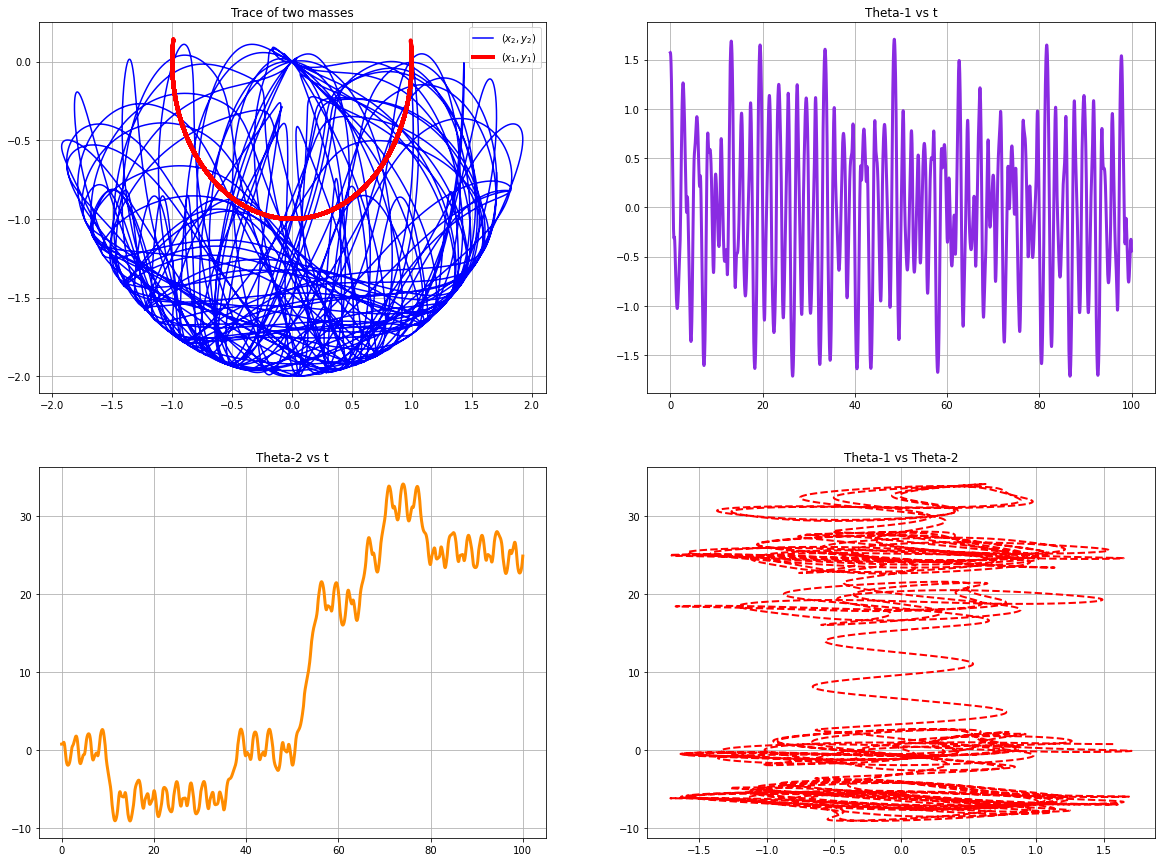

In [27]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(221)
plt.grid()
ax1.plot(x2,y2,label=r"$(x_2,y_2)$",color="Blue")
ax1.plot(x1,y1,label=r"$(x_1,y_1)$",color="Red",linewidth=4)
ax1.legend()
plt.title("Trace of two masses")
ax2 = fig.add_subplot(222)
plt.grid()
ax2.plot(t,th1,color="blueviolet",linewidth=3)
plt.title("Theta-1 vs t")
ax3 = fig.add_subplot(223)
plt.grid()
ax3.plot(t,th2,color="darkorange",linewidth=3)
plt.title("Theta-2 vs t")
ax4 = fig.add_subplot(224)
plt.grid()
ax4.plot(th1,th2,ls='--',color="Red",linewidth=2)
plt.title("Theta-1 vs Theta-2")
plt.show()